## Loading the needs libraries and data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1 Commercial Planning

In [8]:
df_CP = pd.read_excel('Replace_Commercial_Planning.xlsx')
df_CP.head()

,YM,SalesRegion,SKU Code,Price,Rebate,PromotionVolume,Discount
0,201601,Heilongjiang,1,NaN,315557.20,0,15270111.28
1,201601,Heilongjiang,3,NaN,2498.96,0,19372.84
2,201601,Heilongjiang,4,NaN,12866.10,0,761783.16
3,201601,Heilongjiang,5,NaN,12397.02,0,96606.48
4,201601,Heilongjiang,8,NaN,49817.22,0,50453.12


In [19]:
df_CP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3980 entries, 0 to 3979
Data columns (total 7 columns):
YM                 3980 non-null int64
SalesRegion        3980 non-null object
SKU Code           3980 non-null int64
Price              2606 non-null float64
Rebate             3980 non-null float64
PromotionVolume    3980 non-null int64
Discount           3980 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 217.7+ KB


In [32]:
df_CP.groupby('SKU Code').groups

{1: Int64Index([   0,   32,   58,   90,  117,  149,  176,  209,  236,  269,
             ...
             3570, 3589, 3658, 3677, 3746, 3765, 3834, 3853, 3922, 3941],
            dtype='int64', length=102),
 2: Int64Index([  33,   91,  150,  210,  270, 2313, 2401, 2489, 2576, 2664, 2752,
             2840, 2928, 3016, 3104, 3191, 3278, 3366, 3453, 3541, 3629, 3717,
             3805, 3893],
            dtype='int64'),
 3: Int64Index([   1,   34,   59,   92,  118,  151,  177,  211,  237,  271,
             ...
             3568, 3574, 3656, 3662, 3744, 3750, 3832, 3838, 3920, 3926],
            dtype='int64', length=102),
 4: Int64Index([   2,   35,   60,   93,  119,  152,  178,  212,  238,  272,
             ...
             3609, 3615, 3697, 3703, 3785, 3791, 3874, 3879, 3961, 3967],
            dtype='int64', length=102),
 5: Int64Index([   3,   36,   61,   94,  120,  153,  179,  213,  239,  273,
             ...
             3613, 3614, 3701, 3702, 3789, 3790, 3877, 3878, 3965, 3966

In [35]:
grouped = df_CP.groupby('SKU Code')
print(grouped['Price'].agg(np.max))

SKU Code
1      92.00
2      34.80
3      78.40
4     132.60
5     130.00
6     316.80
7     336.00
8      85.80
9     112.80
10    256.00
11    302.40
12    128.00
13     77.80
14     70.80
15     95.20
16     83.00
17     79.00
18     86.00
19     90.00
20     64.80
21     82.80
22    109.32
23    112.00
24     49.60
25     90.40
26     72.00
27    100.80
28    151.20
29    119.60
30     77.80
       ...  
40    100.20
41     54.60
42     47.00
43     38.20
44     72.00
45     73.70
46     88.00
47     62.00
48     58.00
49    126.80
50     74.00
51    104.00
52    105.60
53     72.80
54     87.40
55     76.80
56     79.80
57    107.20
58     26.80
59     68.00
60     68.20
61    126.80
62     90.60
63     68.40
64    103.60
65     96.00
66     97.00
67     60.00
68     96.60
69     46.80
Name: Price, Length: 69, dtype: float64


In [21]:
df_CP['SKU Code'].nunique()

69

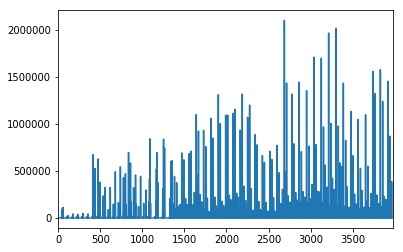

In [23]:
df_CP['PromotionVolume'].plot()

### 1.2 Historical Sales Volume

In [9]:
df_HSV = pd.read_excel('Replace_Historical_Sales_Volume.xlsx')
df_HSV.head()

,Year,Month,YM,Date,SalesRegion,SKU Code,VolumeHL
0,2016,1,201601,2016-01-02,Heilongjiang,1,2019.60
1,2016,1,201601,2016-01-02,Heilongjiang,4,79.20
2,2016,1,201601,2016-01-02,Heilongjiang,9,138.24
3,2016,1,201601,2016-01-02,Heilongjiang,11,31.68
4,2016,1,201601,2016-01-02,Heilongjiang,13,95.04


In [52]:
df_HSV = df_HSV.groupby(['YM','SalesRegion','SKU Code'])['VolumeHL'].sum().to_frame("TotalVolumeHL").reset_index()

In [53]:
df_HSV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3814 entries, 0 to 3813
Data columns (total 4 columns):
YM               3814 non-null int64
SalesRegion      3814 non-null object
SKU Code         3814 non-null int64
TotalVolumeHL    3814 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 119.3+ KB


In [54]:
df_HSV.head()

,YM,SalesRegion,SKU Code,TotalVolumeHL
0,201601,Heilongjiang,1,60470.880
1,201601,Heilongjiang,4,2962.080
2,201601,Heilongjiang,5,302.880
3,201601,Heilongjiang,8,3561.054
4,201601,Heilongjiang,9,4881.600


### 1.3 Product Master Data

In [10]:
df_PMD = pd.read_excel('Replace_Product_Master_Data.xlsx')
df_PMD.head()

,SKU Code,Brand,Package,Segment
0,1,middle-end 2,Big Bottle,middle-end
1,2,middle-end 2,Big Bottle,middle-end
2,3,middle-end 2,Big Can,middle-end
3,4,middle-end 2,Small Bottle,middle-end
4,5,high-end 2,Big Bottle,high-end


In [25]:
df_PMD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 4 columns):
SKU Code    69 non-null int64
Brand       69 non-null object
Package     69 non-null object
Segment     69 non-null object
dtypes: int64(1), object(3)
memory usage: 2.2+ KB


### 1.4 Summary

In [18]:
print('Replace_Commercial_Planning: \n', df_CP.describe())
print('-----------------------------------------------------------------------------')
print('Replace_Historical_Sales_Volume: \n', df_HSV.describe())
print('-----------------------------------------------------------------------------')
print('Replace_Product_Master_Data: \n', df_PMD.describe())

Replace_Commercial_Planning: 
                   YM     SKU Code        Price        Rebate  PromotionVolume  \
count    3980.000000  3980.000000  2606.000000  3.980000e+03     3.980000e+03   
mean   201787.480402    29.161307   110.167421  5.297687e+04     3.300774e+04   
std       119.430486    18.621739    78.681719  1.089691e+05     1.474714e+05   
min    201601.000000     1.000000    26.800000  0.000000e+00     0.000000e+00   
25%    201705.000000    13.000000    69.900000  4.029550e+03     0.000000e+00   
50%    201805.000000    28.000000    87.400000  1.675254e+04     0.000000e+00   
75%    201904.000000    43.000000   114.500000  5.591671e+04     5.261000e+03   
max    202003.000000    69.000000   425.400000  1.836938e+06     2.104206e+06   

           Discount  
count  3.980000e+03  
mean   9.191866e+05  
std    2.284649e+06  
min    0.000000e+00  
25%    4.372251e+04  
50%    2.032739e+05  
75%    6.936419e+05  
max    2.562280e+07  
-----------------------------------------

## Merge the dataframe into new data

### 2.1 Merge HSV and PMD

In [56]:
df_HSV_PMD = pd.merge(df_HSV, df_PMD, on='SKU Code')
df_HSV_PMD

,YM,SalesRegion,SKU Code,TotalVolumeHL,Brand,Package,Segment
0,201601,Heilongjiang,1,60470.880,middle-end 2,Big Bottle,middle-end
1,201601,Jilin,1,14430.000,middle-end 2,Big Bottle,middle-end
2,201602,Heilongjiang,1,40213.920,middle-end 2,Big Bottle,middle-end
3,201602,Jilin,1,7986.000,middle-end 2,Big Bottle,middle-end
4,201603,Heilongjiang,1,45210.960,middle-end 2,Big Bottle,middle-end
5,201603,Jilin,1,11838.000,middle-end 2,Big Bottle,middle-end
6,201604,Heilongjiang,1,24014.880,middle-end 2,Big Bottle,middle-end
7,201604,Jilin,1,11370.000,middle-end 2,Big Bottle,middle-end
8,201605,Heilongjiang,1,30855.600,middle-end 2,Big Bottle,middle-end
9,201605,Jilin,1,8242.800,middle-end 2,Big Bottle,middle-end


### 2.2 Merge CP

In [57]:
df = pd.merge(df_HSV_PMD, df_CP, how='inner',on=['YM','SalesRegion','SKU Code'])
df

,YM,SalesRegion,SKU Code,TotalVolumeHL,Brand,Package,Segment,Price,Rebate,PromotionVolume,Discount
0,201601,Heilongjiang,1,60470.880,middle-end 2,Big Bottle,middle-end,NaN,315557.20,0,15270111.28
1,201601,Jilin,1,14430.000,middle-end 2,Big Bottle,middle-end,NaN,109208.02,0,2331285.04
2,201602,Heilongjiang,1,40213.920,middle-end 2,Big Bottle,middle-end,NaN,171276.50,0,7162297.66
3,201602,Jilin,1,7986.000,middle-end 2,Big Bottle,middle-end,NaN,87585.58,0,2102734.18
4,201603,Heilongjiang,1,45210.960,middle-end 2,Big Bottle,middle-end,NaN,200755.38,0,8600247.18
5,201603,Jilin,1,11838.000,middle-end 2,Big Bottle,middle-end,NaN,113751.12,0,2825421.76
6,201604,Heilongjiang,1,24014.880,middle-end 2,Big Bottle,middle-end,NaN,177040.52,0,7334510.98
7,201604,Jilin,1,11370.000,middle-end 2,Big Bottle,middle-end,NaN,101759.14,0,2514048.68
8,201605,Heilongjiang,1,30855.600,middle-end 2,Big Bottle,middle-end,NaN,247738.90,0,9718131.68
9,201605,Jilin,1,8242.800,middle-end 2,Big Bottle,middle-end,NaN,128798.68,0,3019233.90


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47481 entries, 0 to 47480
Data columns (total 14 columns):
Year               47481 non-null int64
Month              47481 non-null int64
YM                 47481 non-null int64
Date               47481 non-null datetime64[ns]
SalesRegion        47481 non-null object
SKU Code           47481 non-null int64
VolumeHL           47481 non-null float64
Brand              47481 non-null object
Package            47481 non-null object
Segment            47481 non-null object
Price              28202 non-null float64
Rebate             47481 non-null float64
PromotionVolume    47481 non-null int64
Discount           47481 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), object(4)
memory usage: 5.4+ MB


In [39]:
df.describe()

,Year,Month,YM,SKU Code,VolumeHL,Price,Rebate,PromotionVolume,Discount
count,47481.000000,47481.000000,47481.000000,47481.000000,47481.000000,28202.000000,4.748100e+04,4.748100e+04,4.748100e+04
mean,2017.562120,6.406752,201762.618711,31.726185,530.817713,93.532915,9.145373e+04,6.167739e+04,1.679743e+06
std,1.084344,3.365672,108.153655,19.215337,688.041004,55.123127,1.433955e+05,2.036015e+05,3.085292e+06
min,2016.000000,1.000000,201601.000000,1.000000,0.000000,26.800000,0.000000e+00,0.000000e+00,0.000000e+00
25%,2017.000000,4.000000,201703.000000,16.000000,80.180000,67.720000,1.532556e+04,0.000000e+00,1.802902e+05
50%,2018.000000,7.000000,201802.000000,31.000000,273.946000,83.000000,4.243114e+04,0.000000e+00,5.365027e+05
75%,2018.000000,9.000000,201812.000000,44.000000,714.240000,103.600000,1.143924e+05,2.022000e+04,1.667309e+06
max,2019.000000,12.000000,201911.000000,69.000000,10810.800000,425.400000,1.836938e+06,2.104206e+06,2.562280e+07


### 2.3 Dealing with the missing data

In [58]:
temp = []
for i,j in df.groupby(['SalesRegion','SKU Code'])['Price']:
    temp.append(i)

In [59]:
for region, sku in temp:
    missValue = df[(df['SalesRegion'] == 'Heilongjiang') & (df['SKU Code'] == 3) & (df['Price'].notnull())]['Price'].mean()

    a = df[(df['SalesRegion'] == region) & (df['SKU Code'] == sku) & (df['Price'].isnull())].index
    for i in a:
        df.loc[i,'Price'] = missValue

In [60]:
df.isnull().sum()

YM                 0
SalesRegion        0
SKU Code           0
TotalVolumeHL      0
Brand              0
Package            0
Segment            0
Price              0
Rebate             0
PromotionVolume    0
Discount           0
dtype: int64

In [61]:
df.head()

,YM,SalesRegion,SKU Code,TotalVolumeHL,Brand,Package,Segment,Price,Rebate,PromotionVolume,Discount
0,201601,Heilongjiang,1,60470.88,middle-end 2,Big Bottle,middle-end,74.367692,315557.20,0,15270111.28
1,201601,Jilin,1,14430.00,middle-end 2,Big Bottle,middle-end,74.367692,109208.02,0,2331285.04
2,201602,Heilongjiang,1,40213.92,middle-end 2,Big Bottle,middle-end,74.367692,171276.50,0,7162297.66
3,201602,Jilin,1,7986.00,middle-end 2,Big Bottle,middle-end,74.367692,87585.58,0,2102734.18
4,201603,Heilongjiang,1,45210.96,middle-end 2,Big Bottle,middle-end,74.367692,200755.38,0,8600247.18


In [63]:
df.sort_values('SKU Code')

,YM,SalesRegion,SKU Code,TotalVolumeHL,Brand,Package,Segment,Price,Rebate,PromotionVolume,Discount
0,201601,Heilongjiang,1,60470.88,middle-end 2,Big Bottle,middle-end,74.367692,315557.20,0,15270111.28
69,201811,Jilin,1,7318.80,middle-end 2,Big Bottle,middle-end,73.800000,97476.24,200,1876463.24
68,201811,Heilongjiang,1,14636.16,middle-end 2,Big Bottle,middle-end,92.000000,118268.10,0,2986475.76
67,201810,Jilin,1,7794.24,middle-end 2,Big Bottle,middle-end,73.800000,93255.40,20,1753986.10
66,201810,Heilongjiang,1,12908.16,middle-end 2,Big Bottle,middle-end,92.000000,162518.02,0,3569855.96
65,201809,Jilin,1,10210.56,middle-end 2,Big Bottle,middle-end,73.800000,119778.96,40,2378099.84
64,201809,Heilongjiang,1,19811.52,middle-end 2,Big Bottle,middle-end,92.000000,154718.54,0,4122176.96
63,201808,Jilin,1,10399.20,middle-end 2,Big Bottle,middle-end,73.800000,117048.00,20,2279574.16
62,201808,Heilongjiang,1,20094.12,middle-end 2,Big Bottle,middle-end,92.000000,206779.86,0,5369249.18
61,201807,Jilin,1,9504.72,middle-end 2,Big Bottle,middle-end,73.800000,104240.52,0,1987234.38


## EDA

### Heilongjaing

In [69]:
df_HLJ = df[df['SalesRegion'] == 'Heilongjiang']

In [70]:
df_HLJ.head()

,YM,SalesRegion,SKU Code,TotalVolumeHL,Brand,Package,Segment,Price,Rebate,PromotionVolume,Discount
0,201601,Heilongjiang,1,60470.88,middle-end 2,Big Bottle,middle-end,74.367692,315557.20,0,15270111.28
2,201602,Heilongjiang,1,40213.92,middle-end 2,Big Bottle,middle-end,74.367692,171276.50,0,7162297.66
4,201603,Heilongjiang,1,45210.96,middle-end 2,Big Bottle,middle-end,74.367692,200755.38,0,8600247.18
6,201604,Heilongjiang,1,24014.88,middle-end 2,Big Bottle,middle-end,74.367692,177040.52,0,7334510.98
8,201605,Heilongjiang,1,30855.60,middle-end 2,Big Bottle,middle-end,74.367692,247738.90,0,9718131.68


In [72]:
df_HLJ2 = df_HLJ.groupby(['YM', 'SKU Code', 'Brand', 'Package', 'Segment', 'Price'])['TotalVolumeHL'].sum().to_frame("TotalVolumeHL").reset_index()

In [73]:
df_HLJ2

,YM,SKU Code,Brand,Package,Segment,Price,TotalVolumeHL
0,201601,1,middle-end 2,Big Bottle,middle-end,74.367692,60470.880
1,201601,4,middle-end 2,Small Bottle,middle-end,74.367692,2962.080
2,201601,5,high-end 2,Big Bottle,high-end,74.367692,302.880
3,201601,8,high-end 2,Big Bottle,high-end,74.367692,3561.054
4,201601,9,high-end 2,Big Bottle,high-end,74.367692,4881.600
5,201601,10,high-end 2,Small Can,high-end,74.367692,33.264
6,201601,11,high-end 2,Small Bottle,high-end,74.367692,348.480
7,201601,12,high-end 3,Big Bottle,high-end,74.367692,220.800
8,201601,13,low-end 2,Small Bottle,low-end,74.367692,4039.200
9,201601,14,low-end 2,Big Bottle,low-end,74.367692,21127.216


In [74]:
df_HLJ2.Segment.nunique()

4

In [117]:
le = df_HLJ2[df_HLJ2['Segment'] == 'low-end']

In [118]:
le2 = le.groupby('YM')['TotalVolumeHL'].sum().to_frame("TotalVolumeHL").reset_index()

In [119]:
le2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
YM               47 non-null int64
TotalVolumeHL    47 non-null float64
dtypes: float64(1), int64(1)
memory usage: 832.0 bytes


In [120]:
le2['YM'] = le2['YM'].apply(str)

In [122]:
le2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
YM               47 non-null object
TotalVolumeHL    47 non-null float64
dtypes: float64(1), object(1)
memory usage: 832.0+ bytes


In [123]:
import datetime
# for i in le2['YM']:
#     i = str(i)
#     i = datetime.datetime.strptime(i, "%Y%m")
def formateDate(stringdate):
    dt = datetime.datetime.strptime(stringdate, '%Y%m') #原字符串为"01.12.2013"对应"%d.%m.%Y"
    return dt

le2['YM'] = le2['YM'].apply(formateDate)
# le2['YM'] = le2['YM'].to_string()

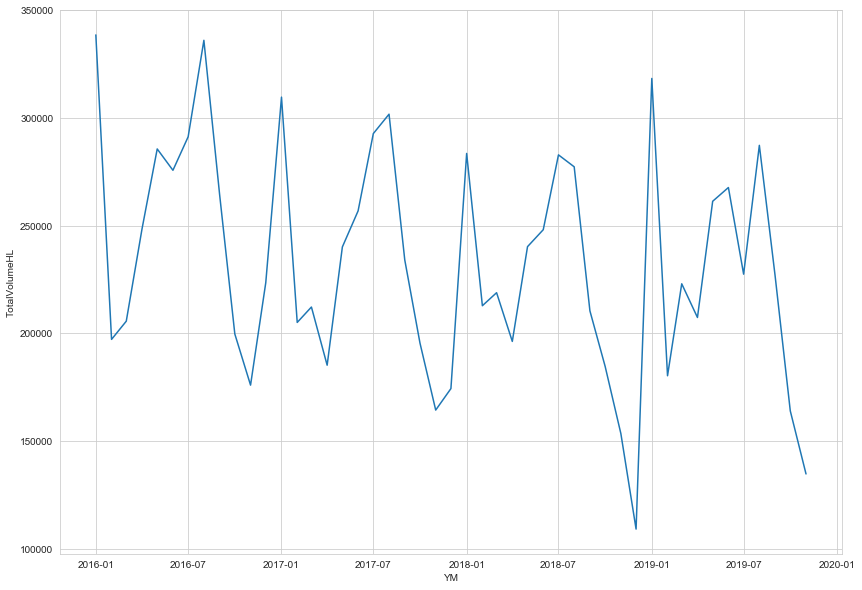

In [124]:
sns.set_style("whitegrid")
plt.figure(figsize = (14, 10))

sns.lineplot(x='YM', y='TotalVolumeHL', data=le2)

plt.show()

In [125]:
me = df_HLJ2[df_HLJ2['Segment'] == 'middle-end']

In [126]:
me2 = me.groupby('YM')['TotalVolumeHL'].sum().to_frame("TotalVolumeHL").reset_index()

In [127]:
me2['YM'] = me2['YM'].apply(str)

In [128]:
me2['YM'] = me2['YM'].apply(formateDate)

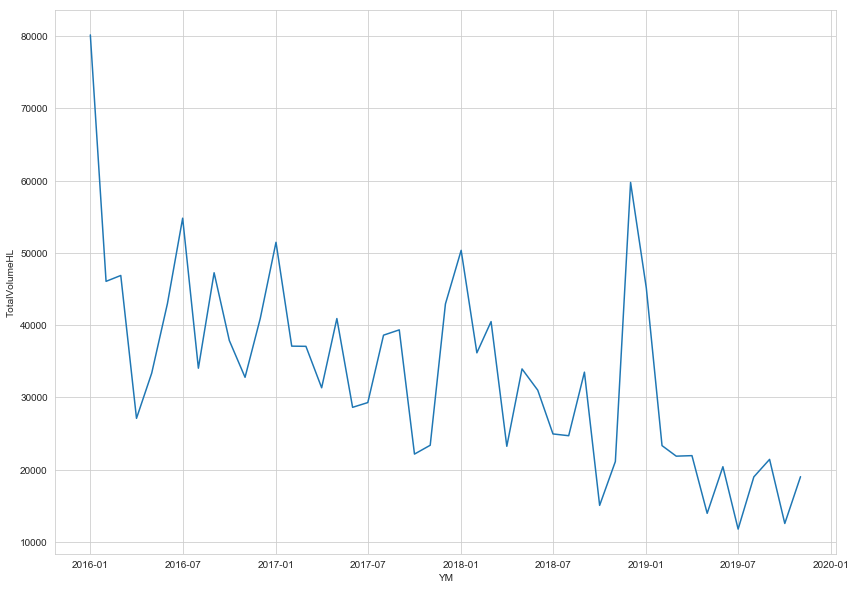

In [129]:
plt.figure(figsize = (14, 10))

sns.lineplot(x='YM', y='TotalVolumeHL', data=me2)

plt.show()

In [130]:
he = df_HLJ2[df_HLJ2['Segment'] == 'high-end']

In [131]:
he2 = he.groupby('YM')['TotalVolumeHL'].sum().to_frame("TotalVolumeHL").reset_index()

In [132]:
he2['YM'] = he2['YM'].apply(str)

In [133]:
he2['YM'] = he2['YM'].apply(formateDate)

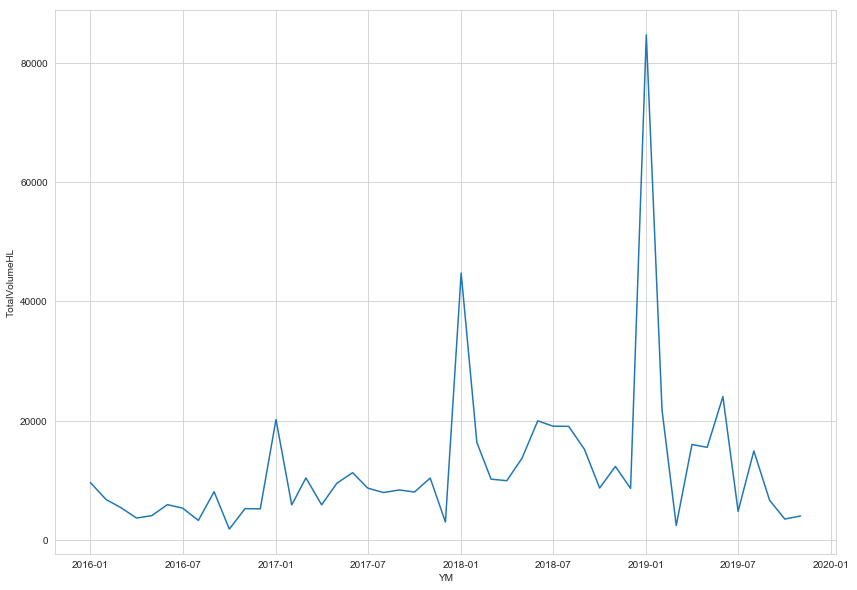

In [134]:
plt.figure(figsize = (14, 10))

sns.lineplot(x='YM', y='TotalVolumeHL', data=he2)

plt.show()

In [135]:
she = df_HLJ2[df_HLJ2['Segment'] == 'super high-end']

In [136]:
she2 = she.groupby('YM')['TotalVolumeHL'].sum().to_frame("TotalVolumeHL").reset_index()

In [137]:
she2['YM'] = she2['YM'].apply(str)

In [138]:
she2['YM'] = she2['YM'].apply(formateDate)

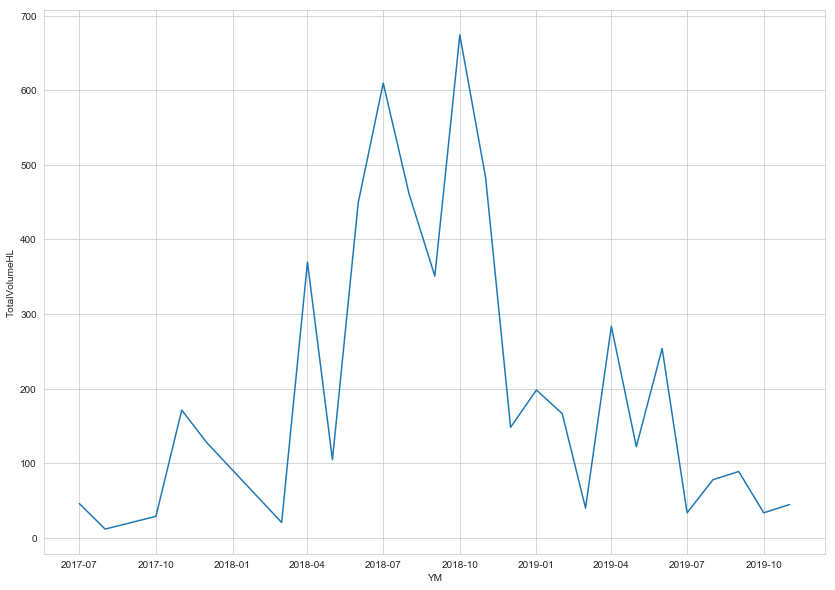

In [139]:
plt.figure(figsize = (14, 10))

sns.lineplot(x='YM', y='TotalVolumeHL', data=she2)

plt.show()

### Jilin

In [140]:
df_JL = df[df['SalesRegion'] == 'Jilin']

In [141]:
df_JL2 = df_JL.groupby(['YM', 'SKU Code', 'Brand', 'Package', 'Segment', 'Price'])['TotalVolumeHL'].sum().to_frame("TotalVolumeHL").reset_index()

In [142]:
df_JL2.Segment.nunique()

3

In [143]:
df_JL2

,YM,SKU Code,Brand,Package,Segment,Price,TotalVolumeHL
0,201601,1,middle-end 2,Big Bottle,middle-end,74.367692,14430.000
1,201601,3,middle-end 2,Big Can,middle-end,74.367692,516.000
2,201601,4,middle-end 2,Small Bottle,middle-end,74.367692,2669.040
3,201601,5,high-end 2,Big Bottle,high-end,74.367692,1290.000
4,201601,6,high-end 2,Small Bottle,high-end,74.367692,63.360
5,201601,7,high-end 2,Small Bottle,high-end,74.367692,22.176
6,201601,8,high-end 2,Big Bottle,high-end,74.367692,1976.160
7,201601,9,high-end 2,Big Bottle,high-end,74.367692,786.000
8,201601,11,high-end 2,Small Bottle,high-end,74.367692,1590.336
9,201601,13,low-end 2,Small Bottle,low-end,74.367692,3367.584


In [144]:
le = df_JL2[df_JL2['Segment'] == 'low-end']

In [145]:
le2 = le.groupby('YM')['TotalVolumeHL'].sum().to_frame("TotalVolumeHL").reset_index()

In [146]:
le2['YM'] = le2['YM'].apply(str)

In [147]:
le2['YM'] = le2['YM'].apply(formateDate)

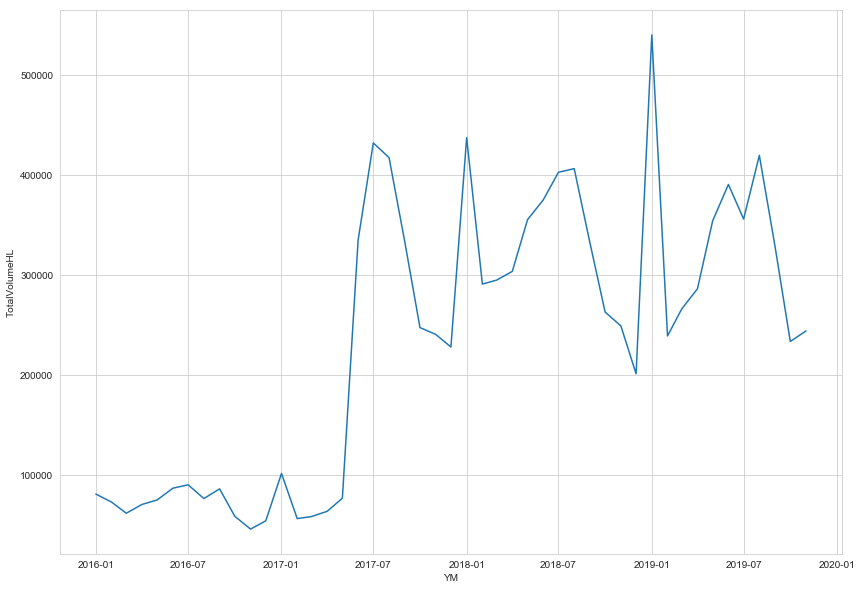

In [149]:
plt.figure(figsize = (14, 10))

sns.lineplot(x='YM', y='TotalVolumeHL', data=le2)

plt.show()

In [150]:
me = df_JL2[df_JL2['Segment'] == 'middle-end']

In [151]:
me2 = me.groupby('YM')['TotalVolumeHL'].sum().to_frame("TotalVolumeHL").reset_index()

In [152]:
me2['YM'] = me2['YM'].apply(str)

In [153]:
me2['YM'] = me2['YM'].apply(formateDate)

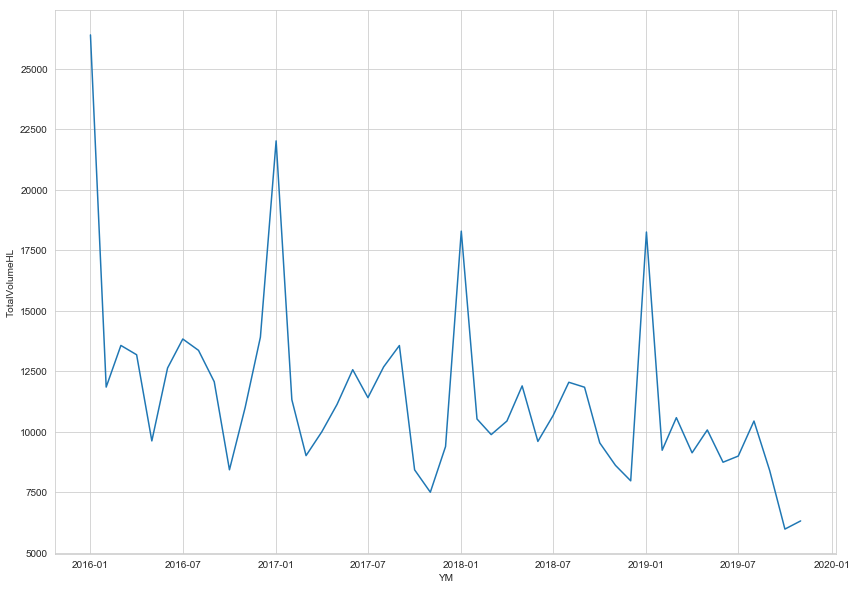

In [154]:
plt.figure(figsize = (14, 10))

sns.lineplot(x='YM', y='TotalVolumeHL', data=me2)

plt.show()

In [155]:
he = df_JL2[df_JL2['Segment'] == 'high-end']

In [156]:
he2 = he.groupby('YM')['TotalVolumeHL'].sum().to_frame("TotalVolumeHL").reset_index()

In [157]:
he2['YM'] = he2['YM'].apply(str)

In [158]:
he2['YM'] = he2['YM'].apply(formateDate)

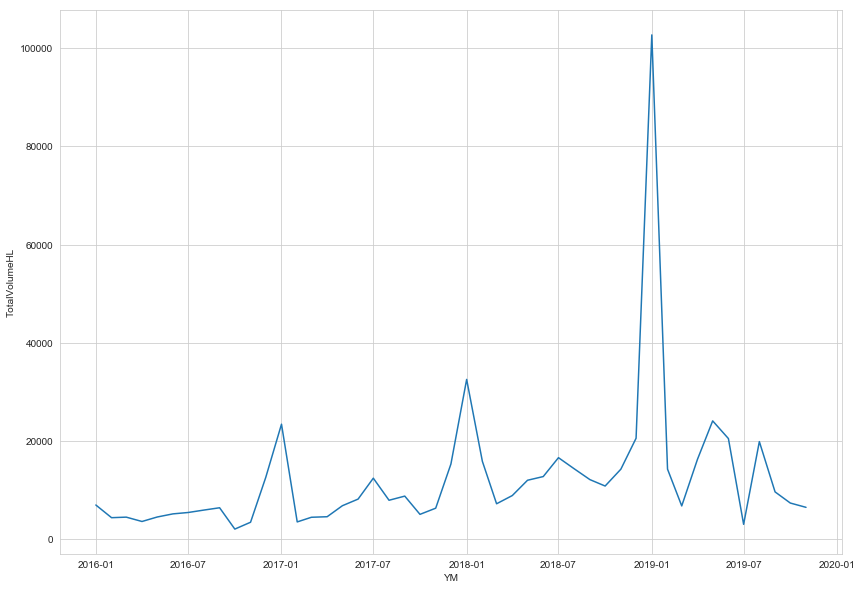

In [159]:
plt.figure(figsize = (14, 10))

sns.lineplot(x='YM', y='TotalVolumeHL', data=he2)

plt.show()